# La Liga Teams Analysis - Visuals
Seven-season view (2019–2026) of La Liga team performance.

Highlights:
- Real Madrid: consistent (541 pts, 69.3% win rate)
- Barcelona: best attack (2.18 goals/match, 517 pts)
- Atlético Madrid: strong defense (475 pts, 58.4% win rate)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def add_bar_labels(ax, data, col, offset=0.5, format_type="decimal"):
    for i, v in enumerate(data[col]):
        if format_type == "percentage":
            label = f"{v * 100:.1f}%"
        elif format_type == "integer":
            label = f"{int(v)}"
        else:
            label = f"{v:.2f}"

        ax.text(v + offset, i, label, fontsize=10, va='center')

In [3]:
financial_scores = pd.read_csv("../CleanedDatasets/Financial/financial_scores.csv")
attendance_metrics = pd.read_csv("../CleanedDatasets/Financial/attendance_metrics.csv")
squad_value_scores = pd.read_csv("../CleanedDatasets/SquadAnalysis/squad_value_scores.csv")
top_players = pd.read_csv("../CleanedDatasets/SquadAnalysis/TopPlayersPerTeam.csv")
performance_metrics = pd.read_csv("../CleanedDatasets/Analysis/performance_metrics.csv")
xg_metrics = pd.read_csv("../CleanedDatasets/Analysis/xg_metrics.csv")
home_away_metrics = pd.read_csv("../CleanedDatasets/Analysis/home_away_metrics.csv")
h2h_metrics = pd.read_csv("../CleanedDatasets/Analysis/h2h_metrics.csv")
league_positions = pd.read_csv("../CleanedDatasets/Analysis/league_positions.csv")
performance_metrics

,Team,TotalMatches,Wins,Draws,Losses,WinRate,DrawRate,LossRate,TotalGoalsFor,TotalGoalsAgainst,...,AvgGoalsAgainst,GoalDifference,AvgGoalDifference,TotalPoints,PointsPerGame,AvgLeaguePosition,BestPosition,WorstPosition,PositionStdDev,ConsistencyScore
0,Athletic Club,238,94,73,71,0.394958,0.306723,0.298319,301,235,...,0.987395,66,0.277311,355,1.491597,7.714286,4,11,2.429972,75.700284
1,Celta Vigo,238,71,72,95,0.298319,0.302521,0.399160,294,329,...,1.382353,-35,-0.147059,285,1.197479,11.857143,7,17,3.484660,65.153397
2,Valencia,238,72,74,92,0.302521,0.310924,0.386555,280,319,...,1.340336,-39,-0.163866,290,1.218487,11.857143,9,18,3.387653,66.123474
3,Mallorca,200,56,51,93,0.280000,0.255000,0.465000,192,274,...,1.370000,-82,-0.410000,219,1.095000,14.333333,9,19,3.983298,60.167015
4,Leganés,76,17,25,34,0.223684,0.328947,0.447368,69,107,...,1.407895,-38,-0.500000,76,1.000000,18.000000,18,18,0.000000,100.000000
5,Villarreal,238,108,60,70,0.453782,0.252101,0.294118,399,296,...,1.243697,103,0.432773,384,1.613445,5.714286,3,8,1.704336,82.956638
6,Alavés,200,52,52,96,0.260000,0.260000,0.480000,184,284,...,1.420000,-100,-0.500000,208,1.040000,14.666667,10,20,3.502380,64.976199
7,Espanol,162,39,47,76,0.240741,0.290123,0.469136,173,242,...,1.493827,-69,-0.425926,164,1.012346,14.600000,5,20,5.941380,40.586197
8,Real Betis,238,97,69,72,0.407563,0.289916,0.302521,326,298,...,1.252101,28,0.117647,360,1.512605,7.285714,5,15,3.450328,65.496722
9,Atletico Madrid,238,139,58,41,0.584034,0.243697,0.172269,409,211,...,0.886555,198,0.831933,475,1.995798,3.000000,1,4,1.000000,90.000000


In [4]:
# Top 10 Teams
financial_top10 = financial_scores.nlargest(10, "FinancialScore")
rev_top10 = attendance_metrics[attendance_metrics["Team"].isin(financial_top10["Team"])].sort_values(
    "EstimatedMatchdayRevenue", ascending=False)

top10_squad = squad_value_scores.nlargest(10, "SquadValueScore")
squad_top10 = squad_value_scores[squad_value_scores["Team"].isin(top10_squad["Team"])]


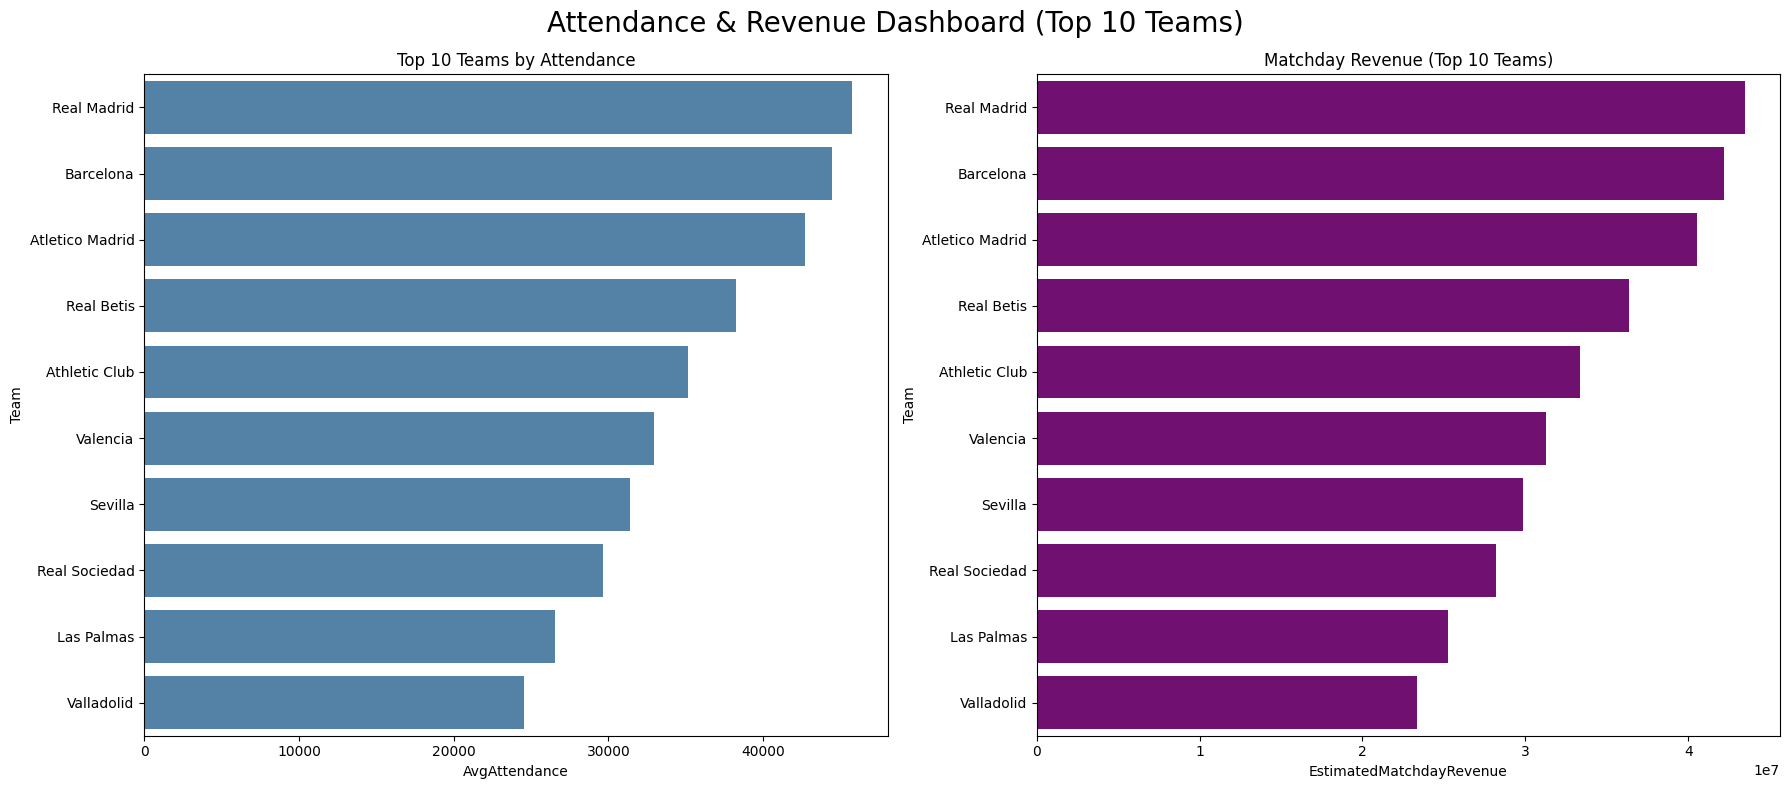

In [5]:
att_top10 = attendance_metrics.nlargest(10, "AvgAttendance").sort_values("AvgAttendance", ascending=False)
rev_top10_sorted = rev_top10.sort_values("EstimatedMatchdayRevenue", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Attendance
sns.barplot(data=att_top10, x="AvgAttendance", y="Team", color="steelblue", ax=axes[0])
axes[0].set_title("Top 10 Teams by Attendance")

# Matchday Revenue
sns.barplot(data=rev_top10_sorted, x="EstimatedMatchdayRevenue", y="Team", color="purple", ax=axes[1])
axes[1].set_title("Matchday Revenue (Top 10 Teams)")

plt.suptitle("Attendance & Revenue Dashboard (Top 10 Teams)", fontsize=20)
plt.tight_layout()
plt.savefig("../Outputs/attendance_revenue_dashboard.png")
plt.show()


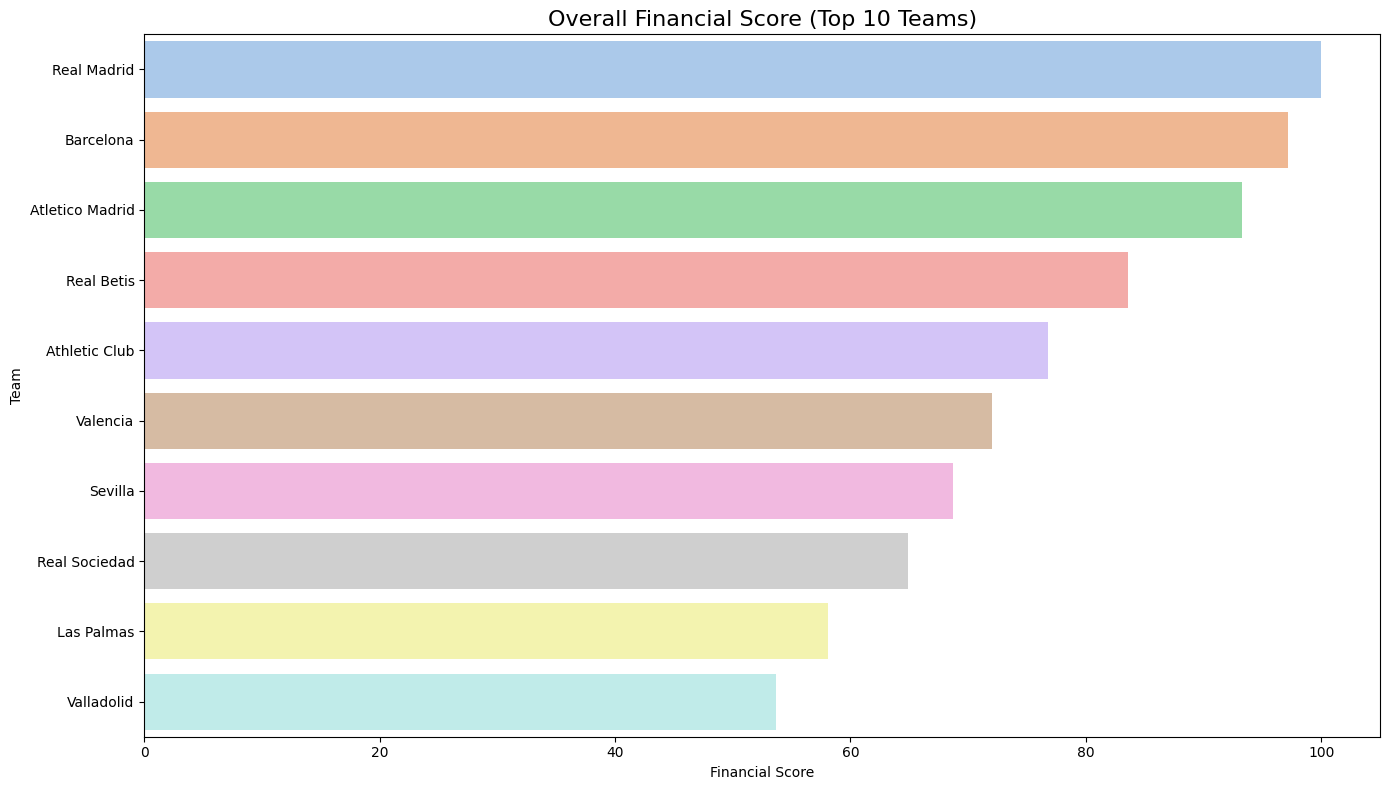

In [6]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=financial_top10, x="FinancialScore", y="Team", hue="Team", palette="pastel", legend=False)
plt.title("Overall Financial Score (Top 10 Teams)", fontsize=16)
plt.xlabel("Financial Score")
plt.ylabel("Team")

plt.tight_layout()
plt.savefig("../Outputs/financial_score_top10.png")
plt.show()


## Financial Analysis

**Top Financial Performers:**
- **Real Madrid:** 75.17 score (45,752 avg attendance, €43.4M revenue)
- **Barcelona:** 74.14 score (44,449 avg attendance, €42.2M revenue)
- **Atlético Madrid:** Third in both attendance and revenue

**Financial Score Formula:**
- Financial Score = (Attendance Score × 50%) + (Revenue Score × 50%)
- Attendance Score = (Avg Attendance / Max) × 50
- Revenue Score = (Estimated Revenue / Max) × 50

## Squad Analysis

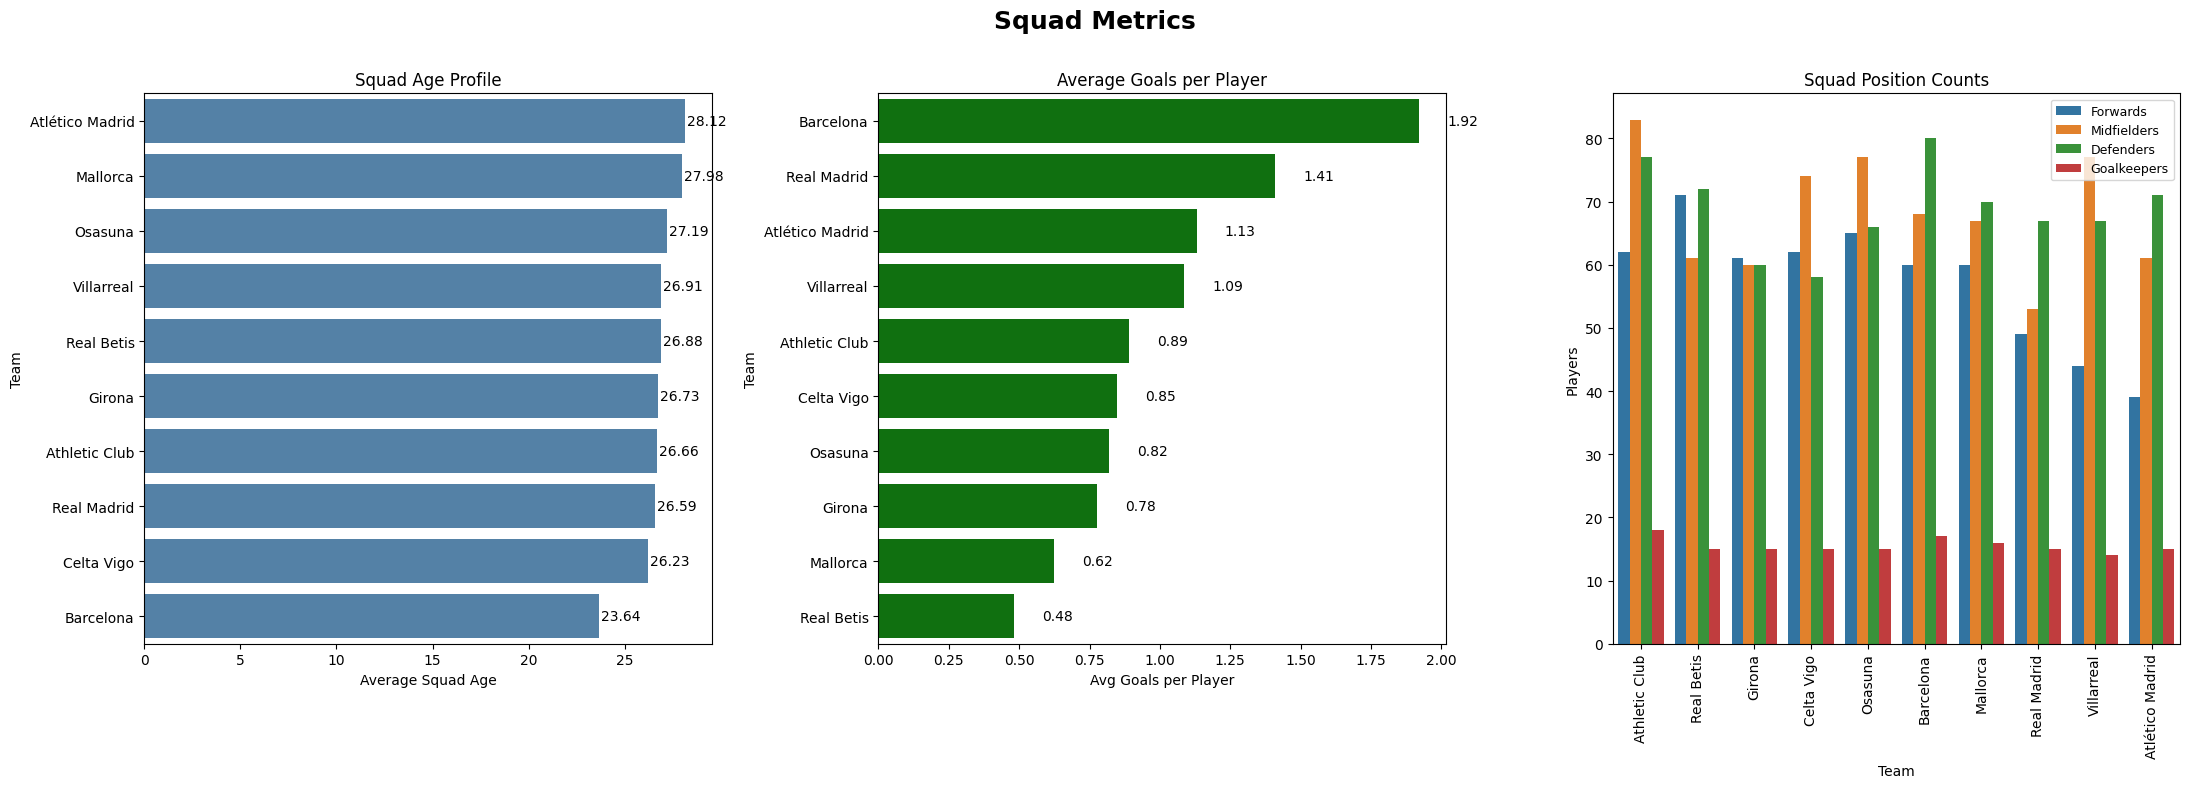

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

# Squad Age
age_sorted = squad_top10.sort_values("AvgAge_x", ascending=False)
sns.barplot(data=age_sorted, x="AvgAge_x", y="Team", color="steelblue", ax=axes[0])
axes[0].set_title("Squad Age Profile")
axes[0].set_xlabel("Average Squad Age")
add_bar_labels(axes[0], age_sorted, "AvgAge_x", offset=0.1, format_type="decimal")

# Average Goals per Player
goals_sorted = squad_top10.sort_values("AvgGoalsPerPlayer", ascending=False)
sns.barplot(data=goals_sorted, x="AvgGoalsPerPlayer", y="Team", color="green", ax=axes[1])
axes[1].set_title("Average Goals per Player")
axes[1].set_xlabel("Avg Goals per Player")
add_bar_labels(axes[1], goals_sorted, "AvgGoalsPerPlayer", offset=0.1, format_type="decimal")

# Squad Position Counts
pos_data = squad_top10[["Team", "Forwards", "Midfielders", "Defenders", "Goalkeepers"]].melt(
    id_vars="Team", var_name="Position", value_name="Count"
)
sns.barplot(data=pos_data, x="Team", y="Count", hue="Position", ax=axes[2])
axes[2].set_title("Squad Position Counts")
axes[2].set_xlabel("Team")
axes[2].set_ylabel("Players")
axes[2].tick_params(axis="x", rotation=90)
axes[2].legend(fontsize=9)

plt.suptitle("Squad Metrics", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../Outputs/squad_metrics_grid.png")
plt.show()


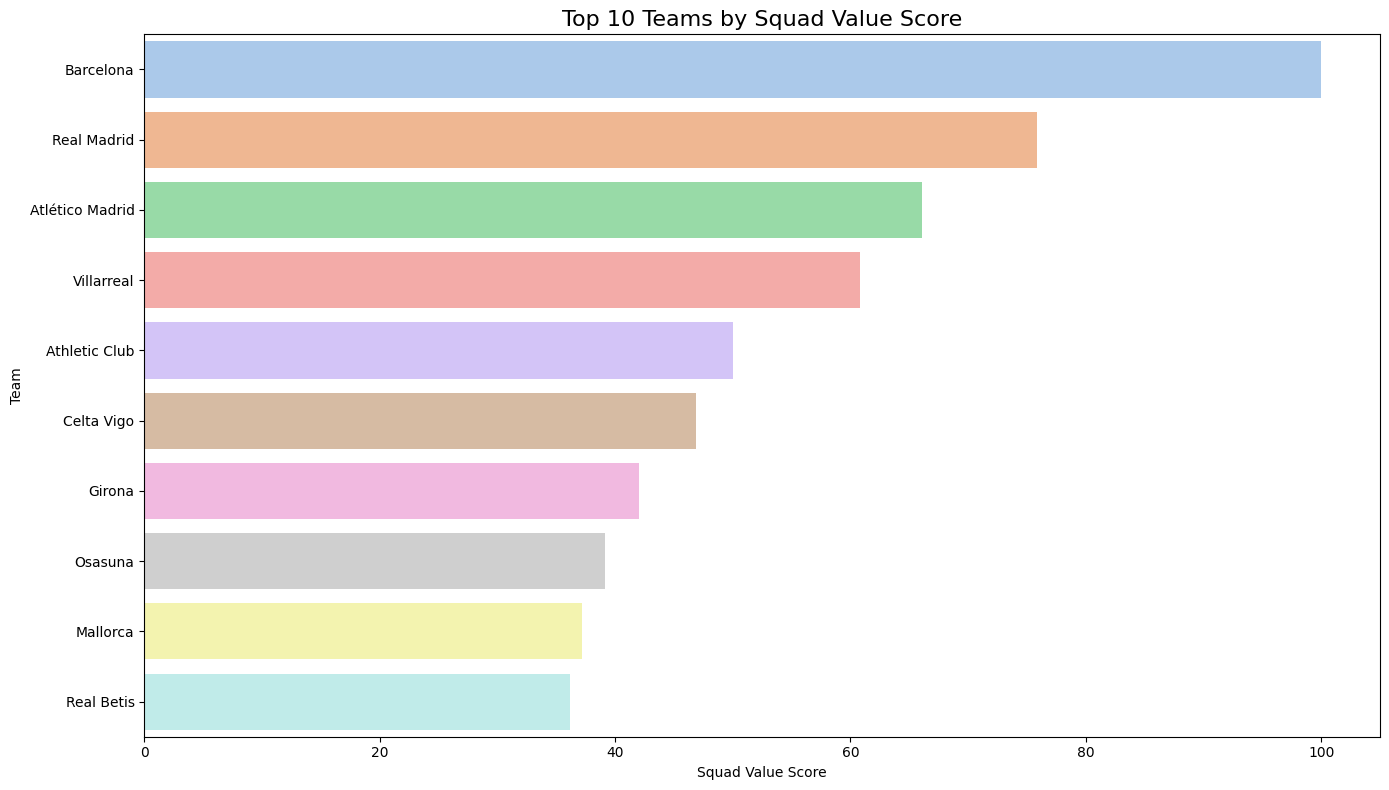

In [8]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top10_squad, x="SquadValueScore", y="Team", hue="Team", palette="pastel", legend=False)
plt.title("Top 10 Teams by Squad Value Score", fontsize=16)
plt.xlabel("Squad Value Score")
plt.ylabel("Team")

plt.tight_layout()
plt.savefig("../Outputs/squad_value_score_top10.png")
plt.show()


### Squad Analysis Summary

**Top Squad Values:**
- **Barcelona:** 81.8 (youngest at 23.64 years, 1.92 goals/player)
- **Real Madrid:** 69.6
- **Atlético Madrid:** 64.5

**Squad Value Score Formula:**
- Squad Value = (Avg Goals/Max × 30) + (Avg Assists/Max × 25) + (Avg xG/Max × 25) + (Avg xAG/Max × 20)

Most teams maintain balanced squads with 60-80 players distributed across all positions.

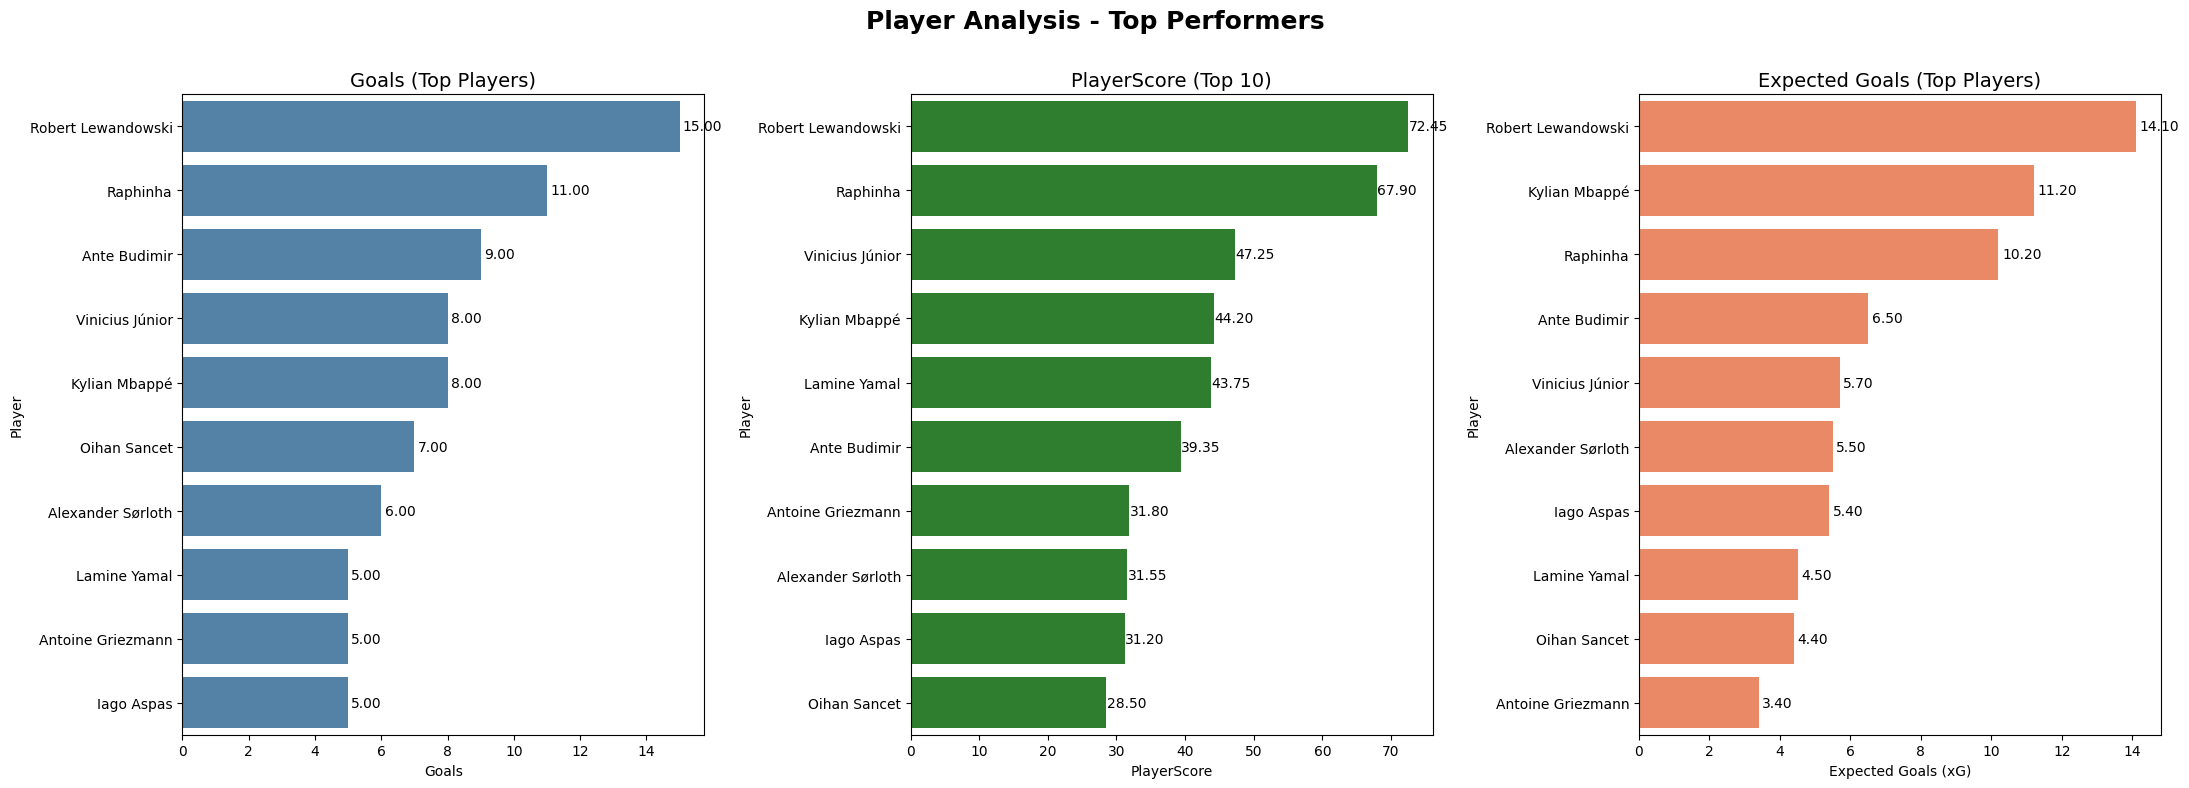

In [9]:
top_players_filtered = top_players.nlargest(10, "PlayerScore")
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

# Goals
goals_sorted = top_players_filtered.sort_values("Goals", ascending=False)
sns.barplot(data=goals_sorted, x="Goals", y="Player", color="steelblue", ax=axes[0])
axes[0].set_title("Goals (Top Players)", fontsize=14)
add_bar_labels(axes[0], goals_sorted, "Goals", offset=0.1, format_type="decimal")

# PlayerScore
player_sorted = top_players_filtered.sort_values("PlayerScore", ascending=False)
sns.barplot(data=player_sorted, x="PlayerScore", y="Player", color="forestgreen", ax=axes[1])
axes[1].set_title("PlayerScore (Top 10)", fontsize=14)
add_bar_labels(axes[1], player_sorted, "PlayerScore", offset=0.1, format_type="decimal")

# Expected Goals
xg_sorted = top_players_filtered.sort_values("Expected Goals (xG)", ascending=False)
sns.barplot(data=xg_sorted, x="Expected Goals (xG)", y="Player", color="coral", ax=axes[2])
axes[2].set_title("Expected Goals (Top Players)", fontsize=14)
add_bar_labels(axes[2], xg_sorted, "Expected Goals (xG)", offset=0.1, format_type="decimal")

plt.suptitle("Player Analysis - Top Performers", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../Outputs/player_performance_top10.png")
plt.show()

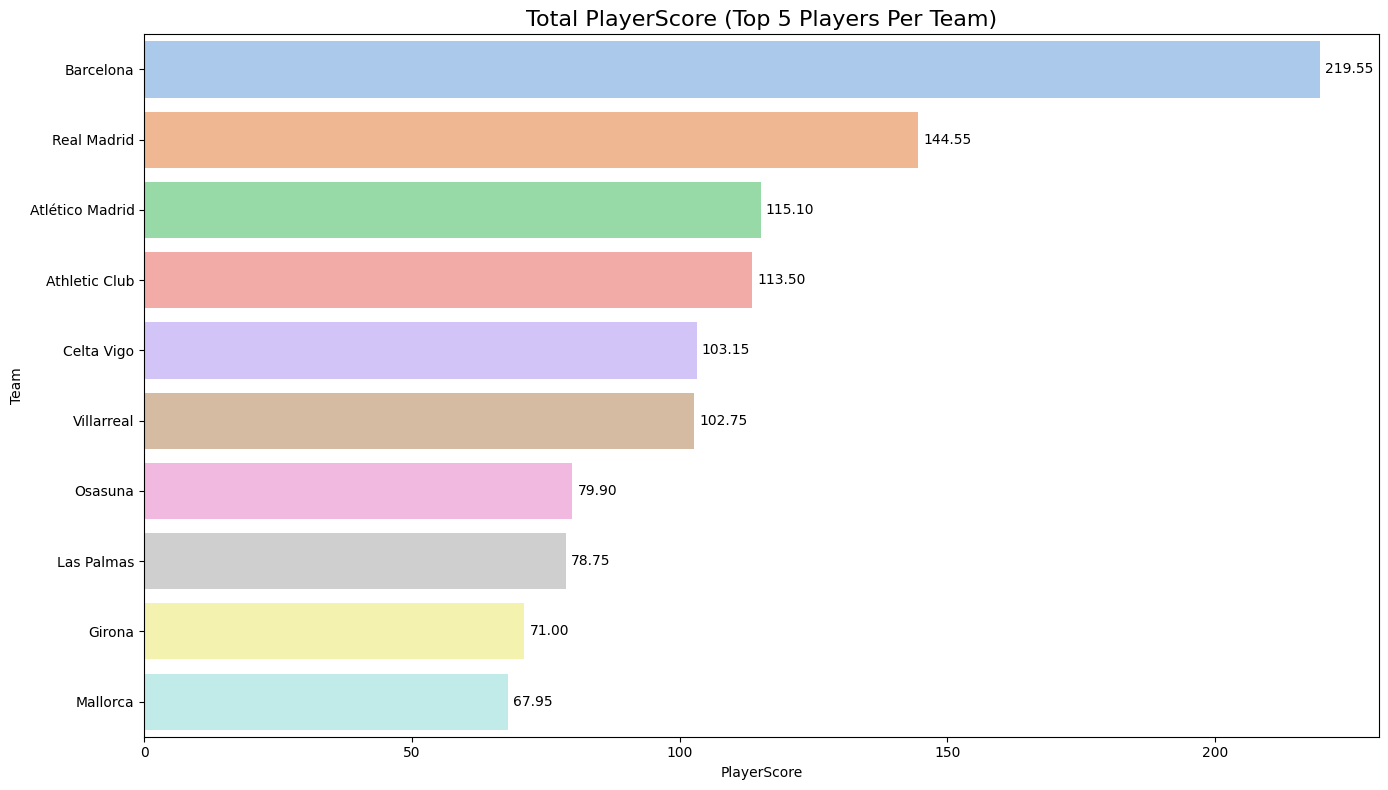

In [10]:
team_totals = top_players.groupby("Team")["PlayerScore"].sum().reset_index().sort_values("PlayerScore", ascending=False).head(10)

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=team_totals, x="PlayerScore", y="Team", hue="Team", palette="pastel", legend=False)
plt.title("Total PlayerScore (Top 5 Players Per Team)", fontsize=16)
plt.xlabel("PlayerScore")
plt.ylabel("Team")
add_bar_labels(ax, team_totals, "PlayerScore", offset=1, format_type="decimal")

plt.tight_layout()
plt.savefig("../Outputs/team_totals_playerscore.png")
plt.show()


### Individual Player Performance

**Top Scorers:** Lewandowski (15 goals), Raphinha (11), Ante Budimir (9)

**Player Score Formula:**
- Player Score = (Goals × 3) + (Assists × 2) + (xG × 1.5) + (xAG × 1)

**Player Score**
- Lewandowski: 72.45
- Raphinha: 67.90
- Vinicius Júnior: 47.25

**Best xG** Lewandowski (14.10), Mbappe (11.20), Raphinha (10.20)

Barcelona's top 5 players collectively score 219.55, better than Real Madrid's 144.55.

## Team Performance Metrics

**Win Rate**
- Real Madrid: 69.3%
- Barcelona: 66.8%
- Atlético Madrid: 58.4%

**Offensive(Goals/Match):**
- Barcelona: 2.18 (best attack)
- Real Madrid: 2.01
- Atlético Madrid: Strong defense with balanced attack

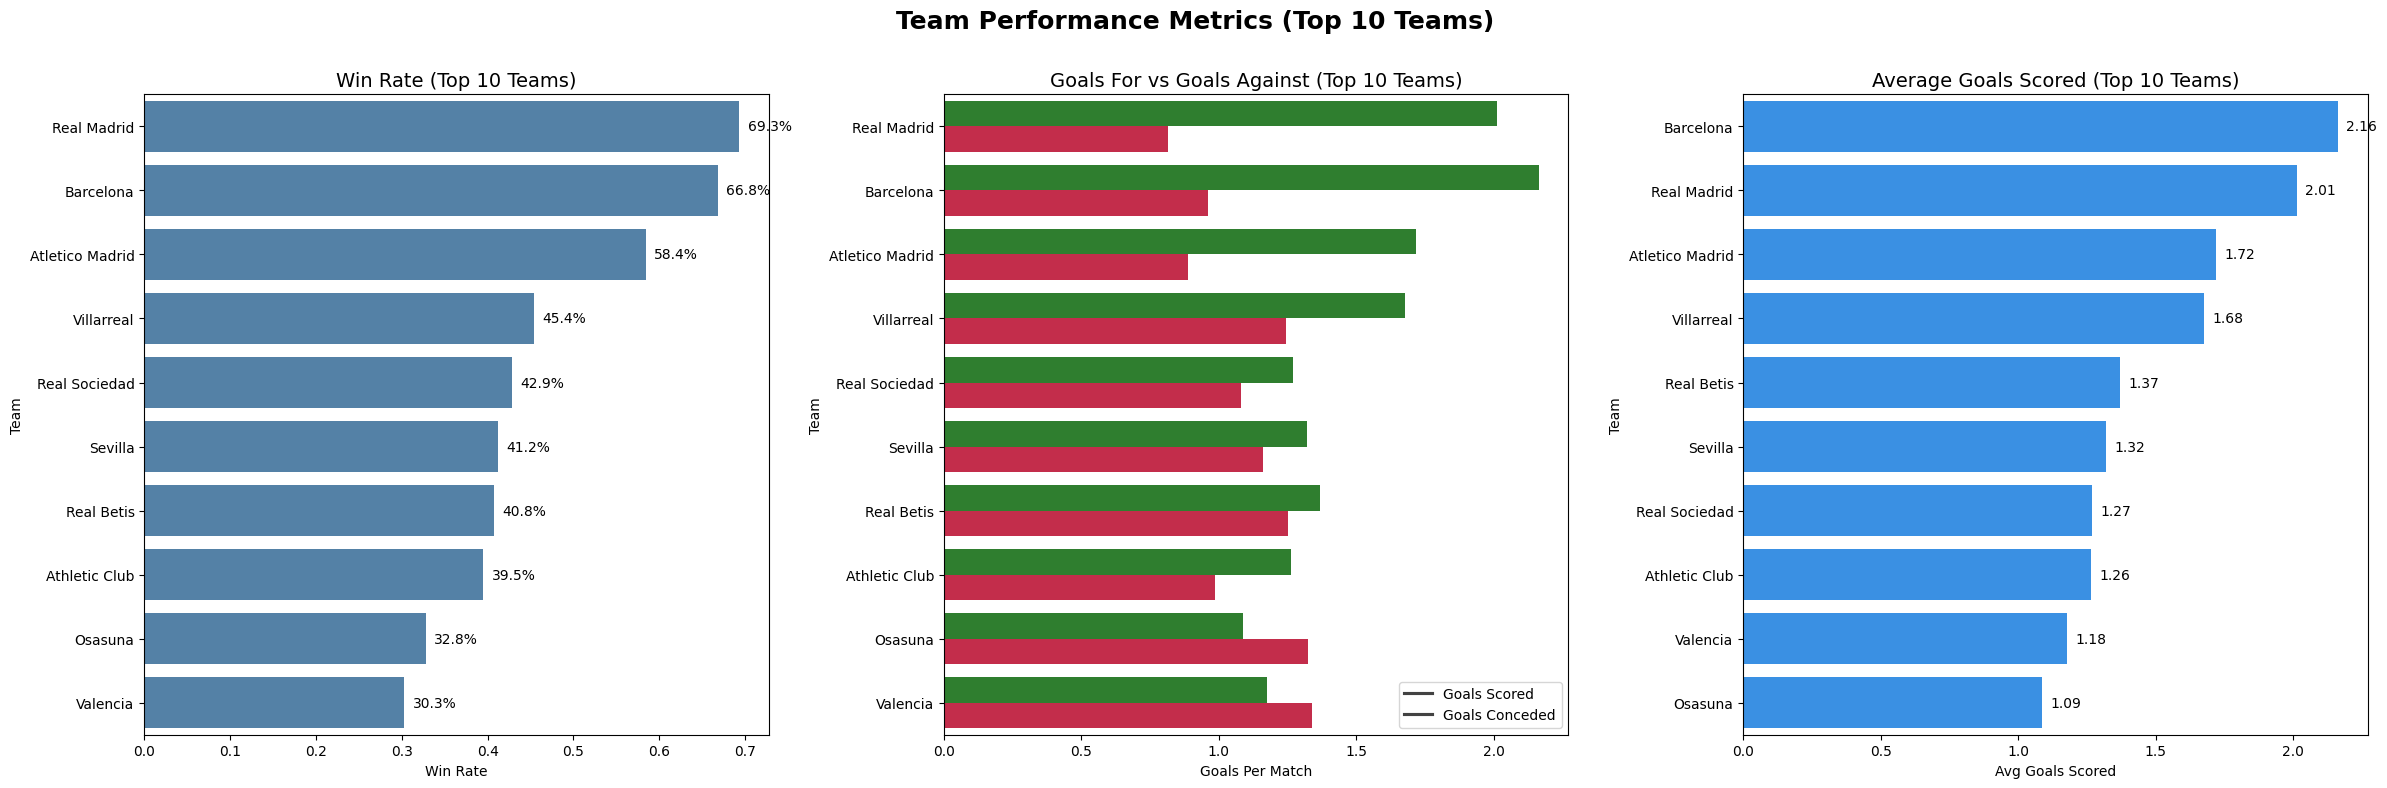

In [11]:
perf_top10 = performance_metrics.nlargest(10, "TotalPoints")
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Win Rate
winrate_sorted = perf_top10.sort_values("WinRate", ascending=False)
sns.barplot(data=winrate_sorted, x="WinRate", y="Team", color="steelblue", ax=axes[0])
axes[0].set_title("Win Rate (Top 10 Teams)", fontsize=14)
axes[0].set_xlabel("Win Rate")
add_bar_labels(axes[0], winrate_sorted, "WinRate", offset=0.01, format_type="percentage")

# Goals For vs Against
attack_defense = perf_top10.sort_values("TotalPoints", ascending=False)[
    ["Team", "AvgGoalsFor", "AvgGoalsAgainst"]].melt(
    id_vars="Team", var_name="Metric", value_name="Goals"
)
sns.barplot(data=attack_defense, x="Goals", y="Team", hue="Metric", ax=axes[1], palette=["forestgreen", "crimson"])
axes[1].set_title("Goals For vs Goals Against (Top 10 Teams)", fontsize=14)
axes[1].set_xlabel("Goals Per Match")
axes[1].legend(title="", labels=["Goals Scored", "Goals Conceded"], fontsize=10, loc="lower right")

# Average Goals Scored
goals_sorted = perf_top10.sort_values("AvgGoalsFor", ascending=False)
sns.barplot(data=goals_sorted, x="AvgGoalsFor", y="Team", color="dodgerblue", ax=axes[2])
axes[2].set_title("Average Goals Scored (Top 10 Teams)", fontsize=14)
axes[2].set_xlabel("Avg Goals Scored")
add_bar_labels(axes[2], goals_sorted, "AvgGoalsFor", offset=0.03, format_type="decimal")

plt.suptitle("Team Performance Metrics (Top 10 Teams)", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../Outputs/performance_metrics_top10.png")
plt.show()


## Home vs Away Performance

**Home Advantage Formula:**
- Home Advantage = Home PPG - Away PPG

**Conclusion:**
- Valencia, Mallorca, Atlético Madrid show strongest home advantage
- Top teams (Real Madrid, Barcelona) maintain consistent performance regardless of venue

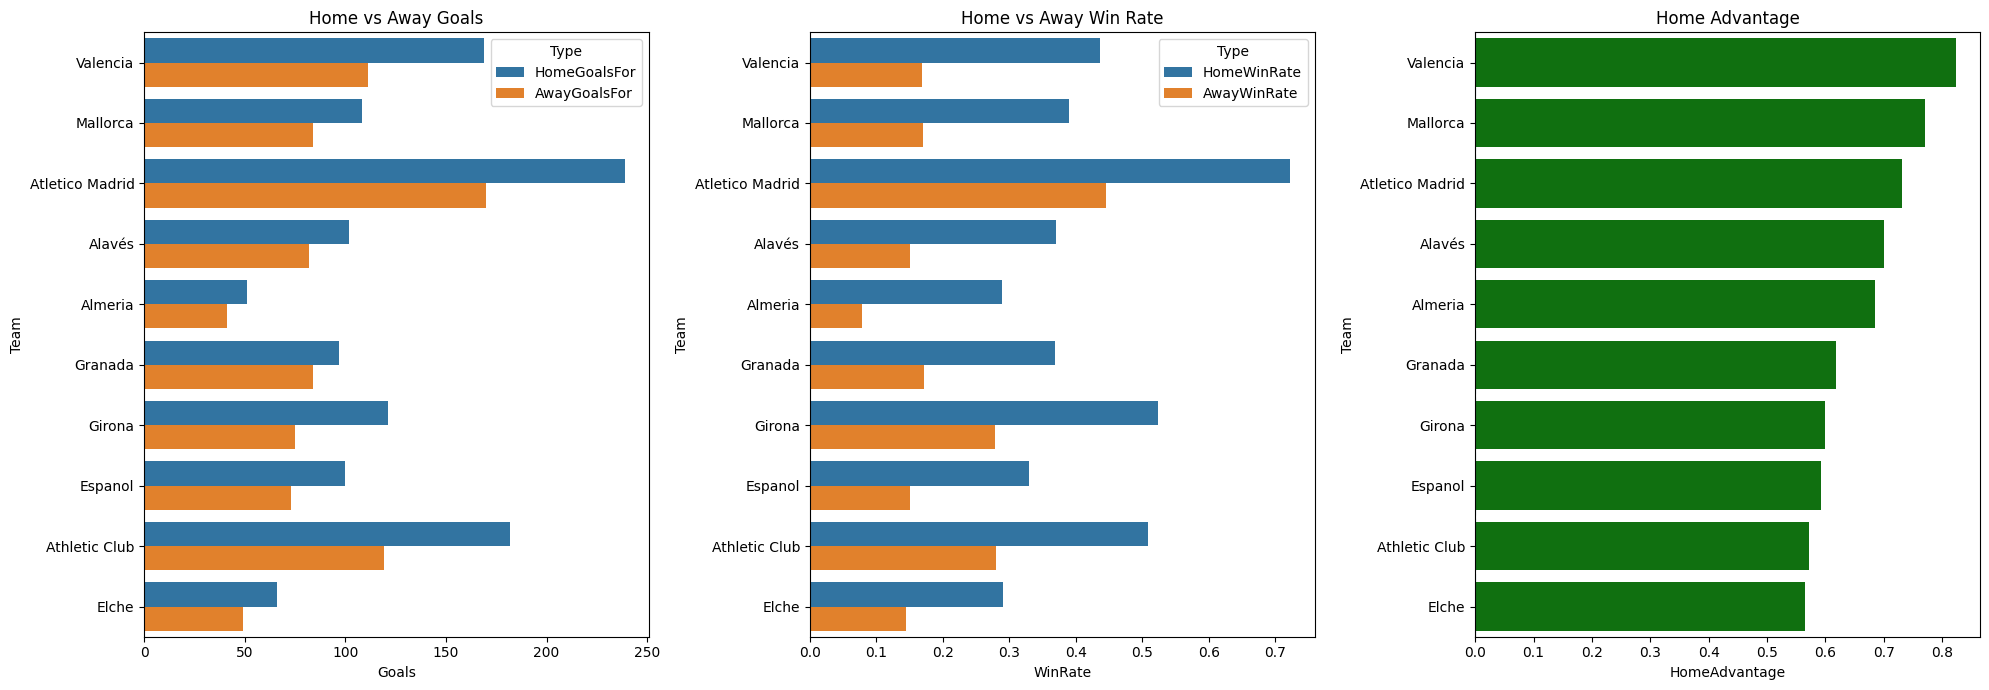

In [12]:
home_top10 = home_away_metrics.nlargest(10, "HomeAdvantage")
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Home vs Away Goals
sns.barplot(
    data=home_top10.melt(id_vars="Team", value_vars=["HomeGoalsFor", "AwayGoalsFor"], var_name="Type", value_name="Goals"),
    x="Goals", y="Team", hue="Type", ax=axes[0]
)
axes[0].set_title("Home vs Away Goals")

# Home vs Away Win Rate
sns.barplot(
    data=home_top10.melt(id_vars="Team", value_vars=["HomeWinRate", "AwayWinRate"], var_name="Type",value_name="WinRate"),
    x="WinRate", y="Team", hue="Type", ax=axes[1]
)
axes[1].set_title("Home vs Away Win Rate")

# Home Advantage
sns.barplot(data=home_top10, x="HomeAdvantage", y="Team", ax=axes[2], color="green")
axes[2].axvline(0, linestyle="--")
axes[2].set_title("Home Advantage")

plt.tight_layout()
plt.savefig("../Outputs/home_away_comparison.png")
plt.show()


## Head-to-Head Performance
**H2H Win Rate Formula:**
- H2H Win Rate = H2H Wins / Total H2H Matches

**Top Performers:**
- Barcelona: 62% (65 wins from 105 matches)
- Real Madrid: 60% (dominates top matchups)
- Atlético Madrid: 50% (balanced against top opposition)

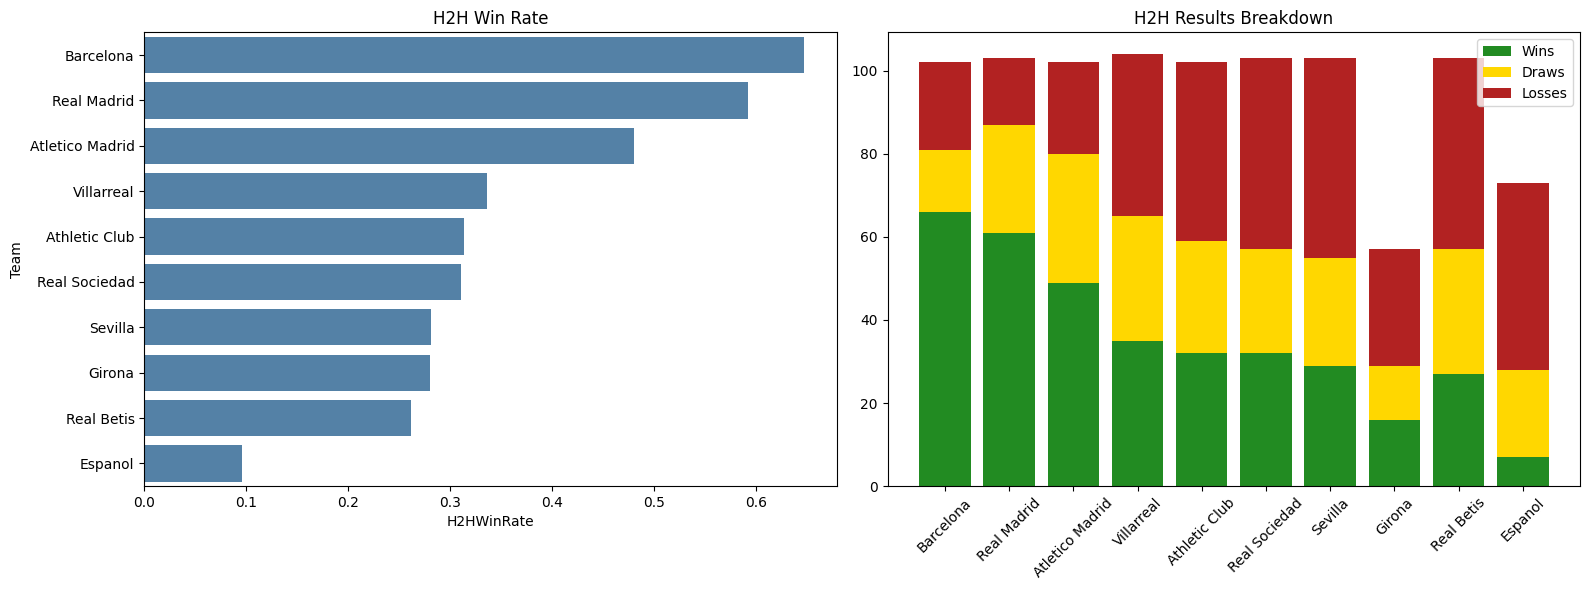

In [13]:
h2h_top10 = h2h_metrics.nlargest(10, "H2HWinRate")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Win Rate
sns.barplot(data=h2h_top10, x="H2HWinRate", y="Team", color="steelblue", ax=axes[0])
axes[0].set_title("H2H Win Rate")

# Results Breakdown
x = range(len(h2h_top10))
axes[1].bar(x, h2h_top10["H2HWins"], label="Wins", color="forestgreen")
axes[1].bar(x, h2h_top10["H2HDraws"], bottom=h2h_top10["H2HWins"], label="Draws", color="gold")
axes[1].bar(x, h2h_top10["H2HLosses"], bottom=h2h_top10["H2HWins"] + h2h_top10["H2HDraws"], label="Losses",
            color="firebrick")

axes[1].set_xticks(x)
axes[1].set_xticklabels(h2h_top10["Team"], rotation=45)
axes[1].set_title("H2H Results Breakdown")
axes[1].legend()

plt.tight_layout()
plt.savefig("../Outputs/h2h_performance.png", dpi=300, bbox_inches="tight")
plt.show()


## League Position Trends
league standings across seasons (2019-2026).

**Consistence Teams:**
- Real Madrid & Barcelona: Consistently top 3 positions
- Minimal fluctuation indicating sustained excellence

**Improvements:**
- Real Betis: 15th → 6th (strong upward trajectory)
- Athletic Club: 11th → 4th by 2025-26 (impressive rise)

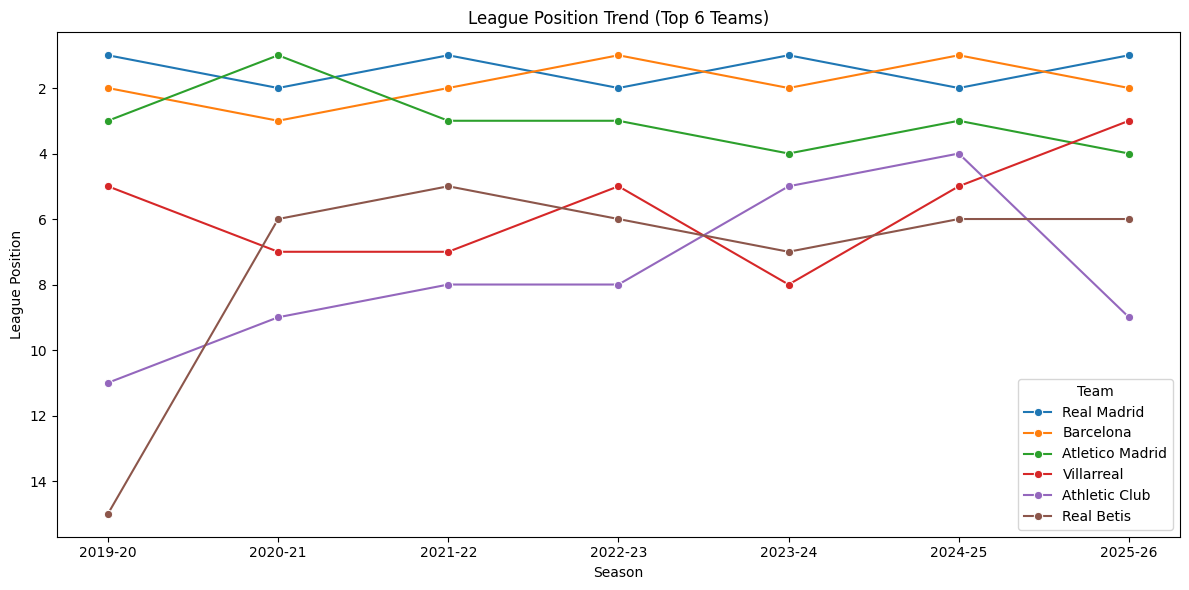

In [14]:
top6_teams = league_positions.groupby("Team")["Position"].mean().nsmallest(6).index
trend_data = league_positions[league_positions["Team"].isin(top6_teams)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x="Season", y="Position", hue="Team", marker="o")

plt.gca().invert_yaxis()
plt.title("League Position Trend (Top 6 Teams)")
plt.xlabel("Season")
plt.ylabel("League Position")
plt.legend(title="Team")
plt.tight_layout()
plt.savefig("../Outputs/league_position_trend.png", dpi=300, bbox_inches="tight")
plt.show()


### Performance Summary

**Total Points (7 seasons):**
- Real Madrid: 541 pts (most consistent)
- Barcelona: 517 pts (superior offensive efficiency)
- Atlético Madrid: 475 pts (defensive solidity)

Barcelona demonstrates (2.18 goals/match) while Real Madrid showcases defence and overall stability.

C:\Users\divya\AppData\Local\Temp\ipykernel_5720\3108306147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_pts, x="TotalPoints", y="Team", palette="pastel")


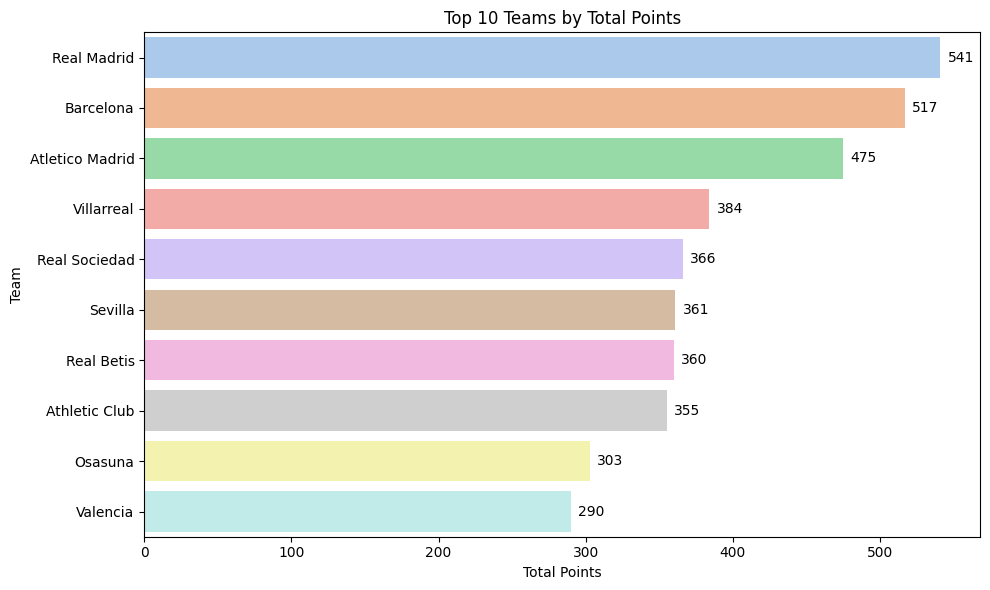

In [15]:
top10_pts = performance_metrics.nlargest(10, "TotalPoints")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10_pts, x="TotalPoints", y="Team", palette="pastel")
plt.title("Top 10 Teams by Total Points")
plt.xlabel("Total Points")
plt.ylabel("Team")
add_bar_labels(ax, top10_pts, "TotalPoints", offset=5, format_type="integer")
plt.tight_layout()
plt.savefig("../Outputs/top10_total_points.png", dpi=300, bbox_inches="tight")
plt.show()
